In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [9]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day2/Kyphosis.csv")
le = LabelEncoder()
y = le.fit_transform(df["Kyphosis"])
X = df.drop("Kyphosis", axis = 1)
print(le.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=24, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

['absent' 'present']
[[ 0.01203504  0.14784746 -0.29536472]]
[0.12694123]
[[16  4]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.43      0.60      0.50         5

    accuracy                           0.76        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.80      0.76      0.77        25

0.76


In [6]:
y_probs = lr.predict_proba(X_test)
y_pred_prob = y_probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

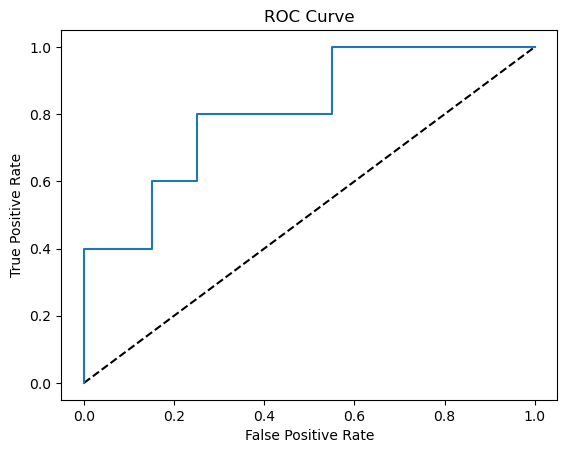

0.81
0.4610519432006946


In [7]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(roc_auc_score(y_test, y_pred_prob))
print(log_loss(y_test,y_pred_prob))